# Linear Regression Basics

Linear Regression is one of the easiest algorithms in machine learning. Here, we will explore this algorithm and we will implement it using Python from scratch.

As the name suggests this algorithm is applicable for Regression problems. Linear Regression is a **Linear Model**. Which means, we will establish a linear relationship between the input variables (**X**) and a single output variable (**Y**). When the input (**X**) is a single variable this model is called **Simple Linear Regression** and when there are multiple input variables (**X**), it is called **Multiple Linear Regression**.

## Simple Linear Regression

We discussed that Linear Regression is a simple model. Simple Linear Regression is the simplest model in machine learning.

### Model Representation

In this problem, we have an input variable - **X** and one output variable - **Y**. And we want to build a linear relationship between these variables. Here the input variable is called **Independent Variable** and the output variable is called **Dependent Variable**. We can define this linear relationship as follows:

$$Y = \beta_0 + \beta_1 X$$

The $\beta_1$ is called a scale factor or **coefficient** and $\beta_0$ is called the **bias coefficient**. The bias coefficient gives an extra degree of freedom to this model. This equation is similar to the line equation $y = mx + b$ with $m = \beta_1$ (Slope) and $b = \beta_0$ (Intercept). So in this Simple Linear Regression model, we want to draw a line between X and Y which estimates the relationship between X and Y.

But how do we find these coefficients? That's the learning procedure. We can find these using different approaches. One is called **Ordinary Least Squares Method** and the other one is called **Gradient Descent Approach**. We will use the Ordinary Least Squares Method in Simple Linear Regression and the Gradient Descent Approach in Multiple Linear Regression in this post.

### Ordinary Least Squares Method

Earlier in this post we discussed that we are going to approximate the relationship between X and Y to a line. Let's say we have a few inputs and outputs. And we plot these scatter points in 2D space, we will get something like the following image.

![Linear Regression](https://i.imgur.com/pXEpE6x.png)

And you can see a line in the image. That's what we are going to accomplish. And we want to minimize the error of our model. A good model will always have the least error. We can find this line by reducing the error. The error of each point is the distance between the line and that point. This is illustrated as follows.

![Residue](https://i.imgur.com/306wvA1.png)

And the total error of this model is the sum of all errors of each point. i.e.

$$ D = \sum_{i=1}^{m} d_i^2 $$

Where:

- $d_i$ is the distance between the line and the $i^{th}$ point.
- $m$ is the total number of points.

You might have noticed that we are squaring each of the distances. This is because some points will be above the line and some points will be below the line. We can minimize the error in the model by minimizing \(D\). And after the mathematics of minimizing \(D\), we will get:

$$ \beta_1 = \frac{\sum_{i=1}^{m} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{m} (x_i - \bar{x})^2} $$

$$ \beta_0 = \bar{y} - \beta_1 \bar{x} $$

In these equations, \(\bar{x}\) is the mean value of input variable **X** and \(\bar{y}\) is the mean value of output variable **Y**.

Now we have the model. This method is called [**Ordinary Least Squares Method**](https://www.wikiwand.com/en/Ordinary_least_squares). Now we will implement this model in Python.

$$ Y = \beta_0 + \beta_1 X $$

$$ \beta_1 = \frac{\sum_{i=1}^{m} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{m} (x_i - \bar{x})^2} $$

$$ \beta_0 = \bar{y} - \beta_1 \bar{x} $$

### Implementation

We are going to use a dataset containing head size and brain weight of different people. This dataset has other features. But, we will not use them in this model. This dataset is available in this [Github Repo](https://github.com/mubaris/potential-enigma). Let's start off by importing the data.


In [1]:
# Importing Necessary Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

!wget "https://github.com/adityamoorthy2/Datasets_for_Summer_School/blob/main/headbrain.csv?raw=true" -O headbrain.csv

# Reading Data
headbrain = pd.read_csv('headbrain.csv')
print(headbrain.shape)
headbrain.head()

--2025-07-01 13:45:16--  https://github.com/adityamoorthy2/Datasets_for_Summer_School/blob/main/headbrain.csv?raw=true
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving github.com (github.com)... 20.207.73.82
Connecting to github.com (github.com)|20.207.73.82|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/adityamoorthy2/Datasets_for_Summer_School/raw/refs/heads/main/headbrain.csv [following]
--2025-07-01 13:45:17--  https://github.com/adityamoorthy2/Datasets_for_Summer_School/raw/refs/heads/main/headbrain.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/adityamoorthy2/Datasets_for_Summer_School/refs/heads/main/headbrain.csv [following]
--2025-07-01 13:45:17--  https://raw.githubusercontent.com/adityamoorthy2/Datasets_for_Summer_School/refs/heads/main/headbrain.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


As you can see there are 237 values in the training set. We will find a linear relationship between Head Size and Brain Weights. So, now we will get these variables.

In [3]:
# Collecting X and Y
X_hb = headbrain['Head Size(cm^3)'].values
Y_hb = headbrain['Brain Weight(grams)'].values

To find the values $\beta_1$ and $\beta_0$, we will need mean of **X** and **Y**. We will find these and the coeffients.

In [5]:
# Mean X and Y
mean_x_hb = np.mean(X_hb)
mean_y_hb = np.mean(Y_hb)

# Total number of values
m_hb = len(X_hb)

# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m_hb):
    numer += (X_hb[i] - mean_x_hb) * (Y_hb[i] - mean_y_hb)
    denom += (X_hb[i] - mean_x_hb) ** 2
b1 = numer / denom
b0 = mean_y_hb - (b1 * mean_x_hb)

# Print coefficients
print(b1, b0)

0.26342933948939945 325.57342104944223


There we have our coefficients.

$$Brain Weight = 325.573421049 + 0.263429339489 * Head Size$$

That is our linear model.

Now we will see this graphically.

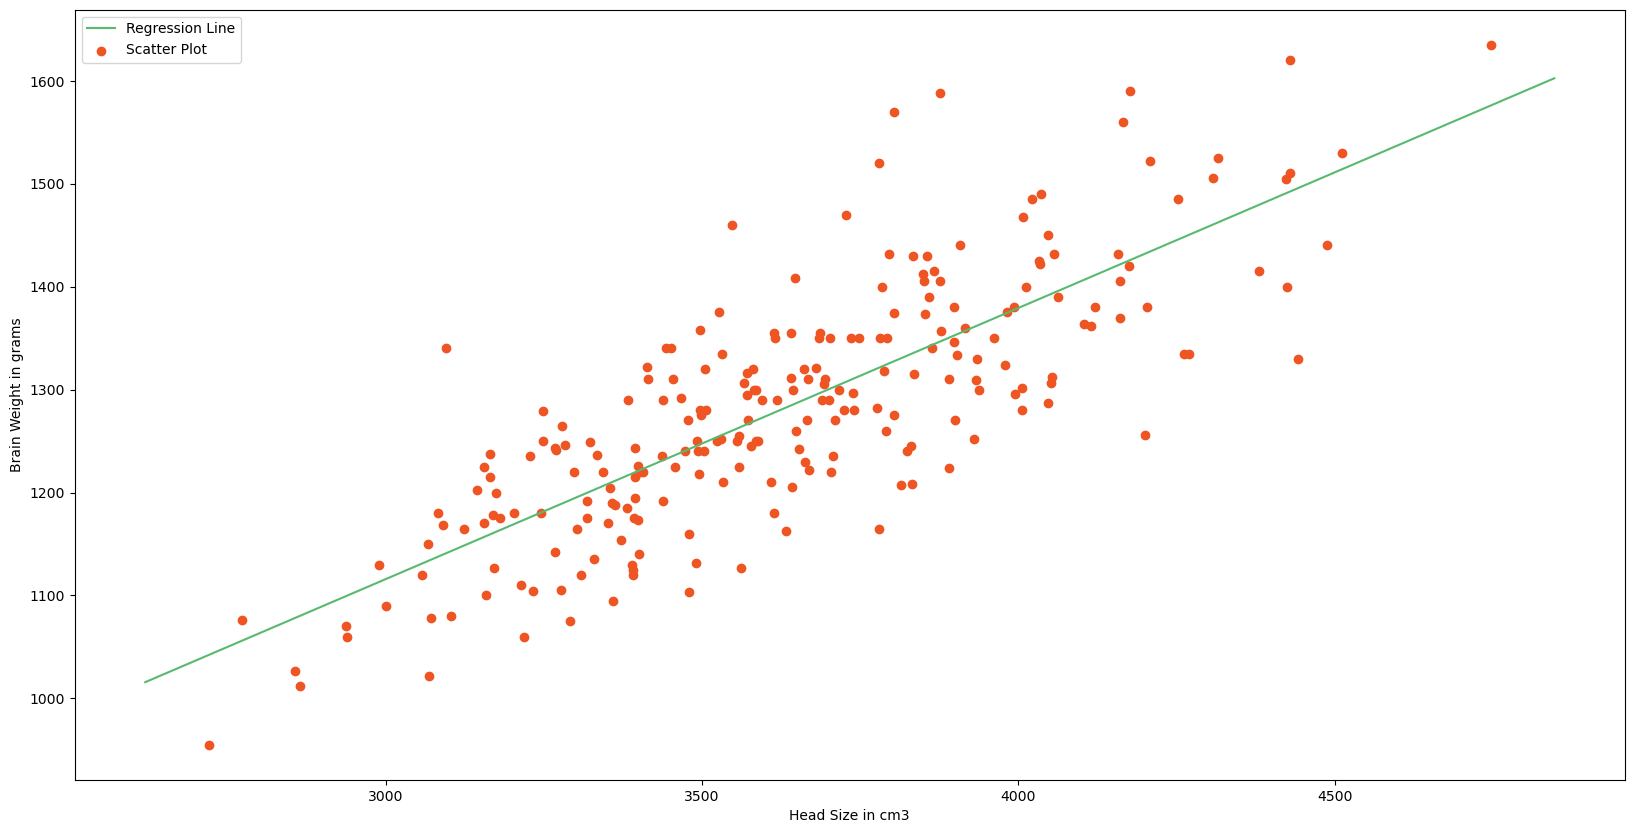

In [6]:
# Plotting Values and Regression Line

max_x_hb = np.max(X_hb) + 100
min_x_hb = np.min(X_hb) - 100

# Calculating line values x and y
x_hb = np.linspace(min_x_hb, max_x_hb, 1000)
y_hb = b0 + b1 * x_hb

# Ploting Line
plt.plot(x_hb, y_hb, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X_hb, Y_hb, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

This model is not so bad. But we need to find how good is our model. There are many methods to evaluate models. We will use **Root Mean Squared Error** and **Coefficient of Determination(\\(R^2\\) Score)**.

Root Mean Squared Error is the square root of sum of all errors divided by number of values, or Mathematically,

$$RMSE = \sqrt{\sum_{i=1}^{m} \frac{1}{m} (\hat{y_i} - y_i)^2}$$

Here $\hat{y_i}$ is the i<sup>th</sup> predicted output values. Now we will find RMSE.

In [7]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(m_hb):
    y_pred_hb = b0 + b1 * X[i]
    rmse += (Y_hb[i] - y_pred_hb) ** 2
rmse = np.sqrt(rmse/m_hb)
print(rmse)

72.1206213783709



### 📏 What is R² Score (Coefficient of Determination)?

The **R² score**, also known as the **coefficient of determination**, is a statistical measure used to evaluate the performance of **regression models**.

It answers the question:

> **"How well does my model explain the variability of the target variable?"**

---

### 🧮 **R² Formula**

$$
R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}
$$

Where:

* $SS_{\text{res}}$ = sum of squared residuals (errors)
* $SS_{\text{tot}}$ = total sum of squares (variance of actual target values from their mean)

---

### ✅ **Interpretation of R²**

| R² Value | Meaning                                                                   |
| -------- | ------------------------------------------------------------------------- |
| 1.0      | Perfect prediction — model explains **100%** of the variance              |
| 0.0      | Model explains **none** of the variance (same as predicting the mean)     |
| < 0      | Worse than a naive model — predictions are worse than just using the mean |

---

### 🎯 **Why R² is a Good Metric (in Regression)**

* **Intuitive**: It gives a single number summarizing model performance.
* **Comparative**: Helps compare different regression models or feature sets.
* **Scale-independent**: R² is unitless and works well for understanding proportion of variance explained.

---

### ✅ Use R² When:

* You're solving a **regression** problem.
* You want to understand **how much of the target's variation** is explained by your features.
* You're comparing models with the **same target variable**.

---

Now we will find $R^2$ score. $R^2$ is defined as follows,

$$SS_t = \sum_{i=1}^{m} (y_i - \bar{y})^2$$

$$SS_r = \sum_{i=1}^{m} (y_i - \hat{y_i})^2$$

$$R^2 \equiv 1 - \frac{SS_r}{SS_t}$$

$SS_t$ is the total sum of squares and $SS_r$ is the total sum of squares of residuals.

$R^2$ Score usually range from 0 to 1. It will also become negative if the model is completely wrong. Now we will find $R^2$ Score.

In [8]:
ss_t = 0
ss_r = 0
for i in range(m_hb):
    y_pred_hb = b0 + b1 * X_hb[i]
    ss_t += (Y_hb[i] - mean_y_hb) ** 2
    ss_r += (Y_hb[i] - y_pred_hb) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


0.63 is not so bad. Now we have implemented Simple Linear Regression Model using Ordinary Least Square Method. Now we will see how to implement the same model using a Machine Learning Library called [scikit-learn](http://scikit-learn.org/)

### The scikit-learn approach

[scikit-learn](http://scikit-learn.org/) is simple machine learning library in Python. Building Machine Learning models are very easy using scikit-learn. Let's see how we can build this Simple Linear Regression Model using scikit-learn.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use Rank 1 matrix in scikit learn
X_hb = X_hb.reshape((m_hb, 1))
# Creating Model
reg_hb = LinearRegression()
# Fitting training data
reg_hb = reg_hb.fit(X_hb, Y_hb)
# Y Prediction
Y_pred_hb = reg_hb.predict(X_hb)

# Calculating RMSE and R2 Score
mse = mean_squared_error(Y_hb, Y_pred_hb)
rmse = np.sqrt(mse)
r2_score = reg_hb.score(X_hb, Y_hb)

print(np.sqrt(mse))
print(r2_score)

72.1206213783709
0.639311719957


You can see that this exactly equals the model we built from scratch, but simpler and with less code.

Now we will move on to Multiple Linear Regression.

## Multiple Linear Regression

Multiple Linear Regression is a type of Linear Regression when the input has multiple features (variables).

### Model Representation

Similar to Simple Linear Regression, we have an input variable (**X**) and output variable (**Y**). But the input variable has \(n\) features. Therefore, we can represent this linear model as follows:

$$Y = \beta_0 + \beta_1 x_1 + \beta_1 x_2 + ... + \beta_n x_n$$

\(x_i\) is the \(i^{th}\) feature in the input variable. By introducing \(x_0 = 1\), we can rewrite this equation.

$$Y = \beta_0 x_0 + \beta_1 x_1 + \beta_1 x_2 + ... + \beta_n x_n$$

$$x_0 = 1$$

Now we can convert this equation to matrix form.

$$Y = \beta^T X$$

Where,

$$\beta = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \\ \vdots \\ \beta_n \end{bmatrix}$$

and

$$X = \begin{bmatrix} x_0 \\ x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix}$$

We have to define the cost of the model. The cost basically gives the error in our model. **Y** in the above equation is our hypothesis (approximation). We are going to define it as our hypothesis function.

$$h_\beta(x) = \beta^T x$$

And the cost is,

$$J(\beta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\beta(x^{(i)}) - y^{(i)})^2$$

By minimizing this cost function, we can find \(\beta\). We use **Gradient Descent** for this.


# Gradient Descent for Beginners


-----------------------------
Gradient descent is an optimization algorithm used to minimize a function.
It is commonly used in machine learning to minimize the cost (or loss) function.

Let's walk through the basics of gradient descent step by step.

First, let's import necessary libraries.



In [12]:
import numpy as np
import matplotlib.pyplot as plt

## 1. What is Gradient Descent?
## -----------------------------
Gradient descent is an iterative optimization algorithm that seeks to minimize a function by 
moving in the direction of the negative gradient. The gradient tells us how steep a function is.
In simpler terms, we take small steps downhill to reach the minimum value of the function.

## 2. The Function
## -------------------------
To demonstrate, let's use a simple quadratic function:
f(x) = x^2
This is a parabola with its minimum at x = 0.

In [13]:
def f(x):
    """Our function f(x) = x^2"""
    return x**2

def df(x):
    """The derivative (slope) of the function f(x) = x^2, which is f'(x) = 2x"""
    return 2*x


Let's visualize the function.

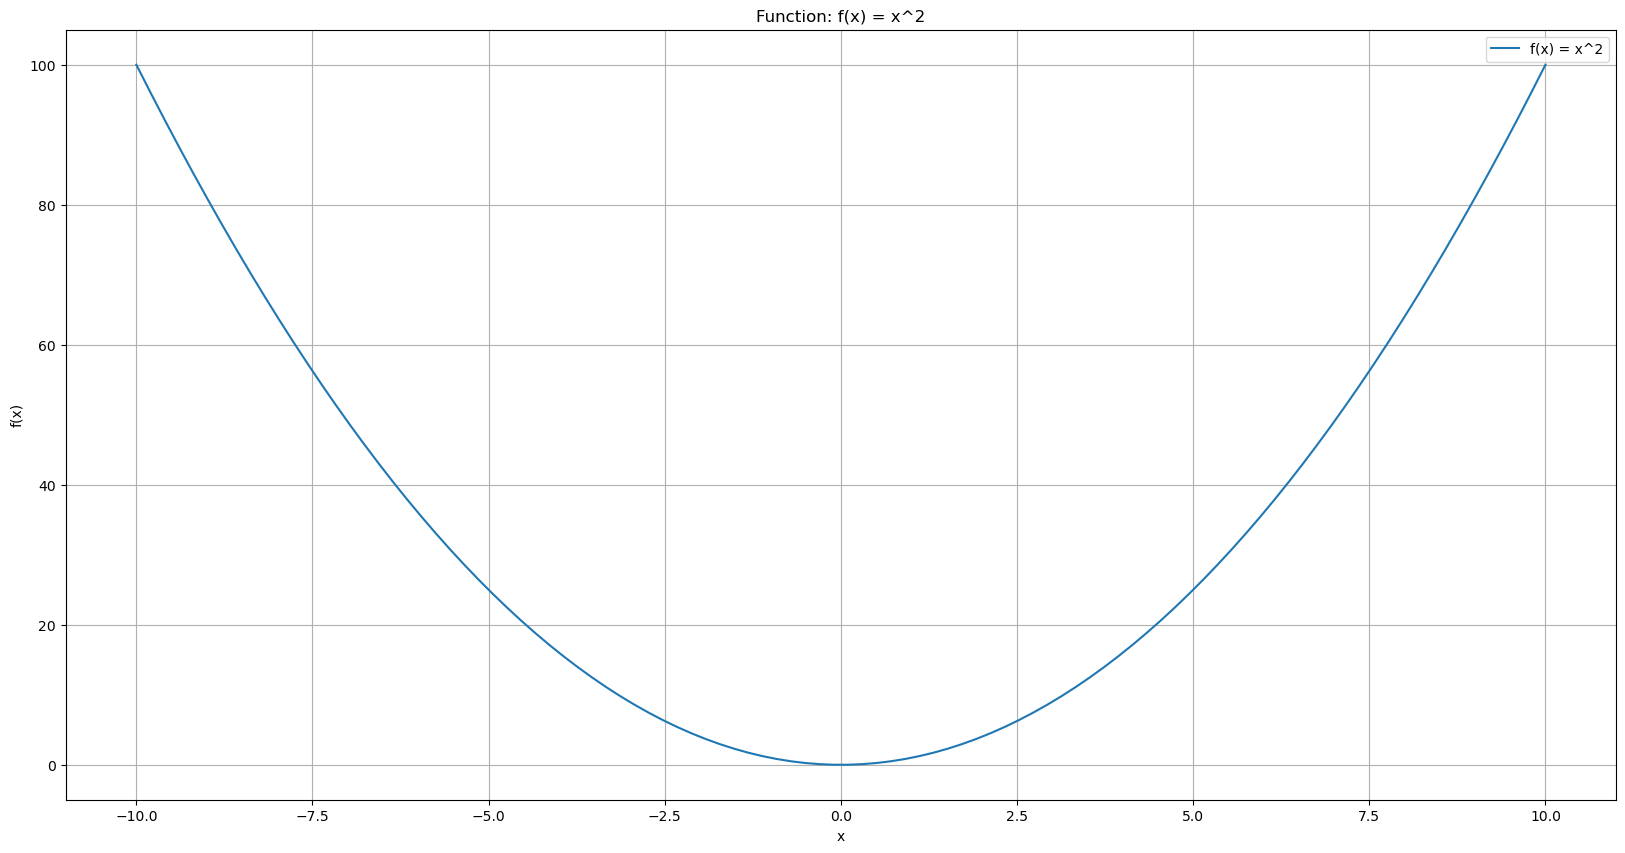

In [14]:
x = np.linspace(-10, 10, 100)  # 100 points from -10 to 10
y = f(x)

plt.plot(x, y, label="f(x) = x^2")
plt.title("Function: f(x) = x^2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()



## 3. Gradient Descent Algorithm
## -----------------------------
### The gradient descent algorithm follows these steps:
#### 1. Start with an initial guess (a random point).
#### 2. Compute the gradient (derivative) at that point.
#### 3. Move a small step in the opposite direction of the gradient.
#### 4. Repeat steps 2-3 until you reach the minimum.

Let's write a simple gradient descent function.


In [15]:

def gradient_descent(learning_rate=0.1, num_iterations=100, initial_guess=10):
    """Performs gradient descent on the function f(x) = x^2."""
    x_current = initial_guess
    x_history = [x_current]
    
    for _ in range(num_iterations):
        # Compute the gradient (derivative)
        gradient = df(x_current)
        
        # Update the current point by moving in the opposite direction of the gradient
        x_current = x_current - learning_rate * gradient
        x_history.append(x_current)
    
    return x_history


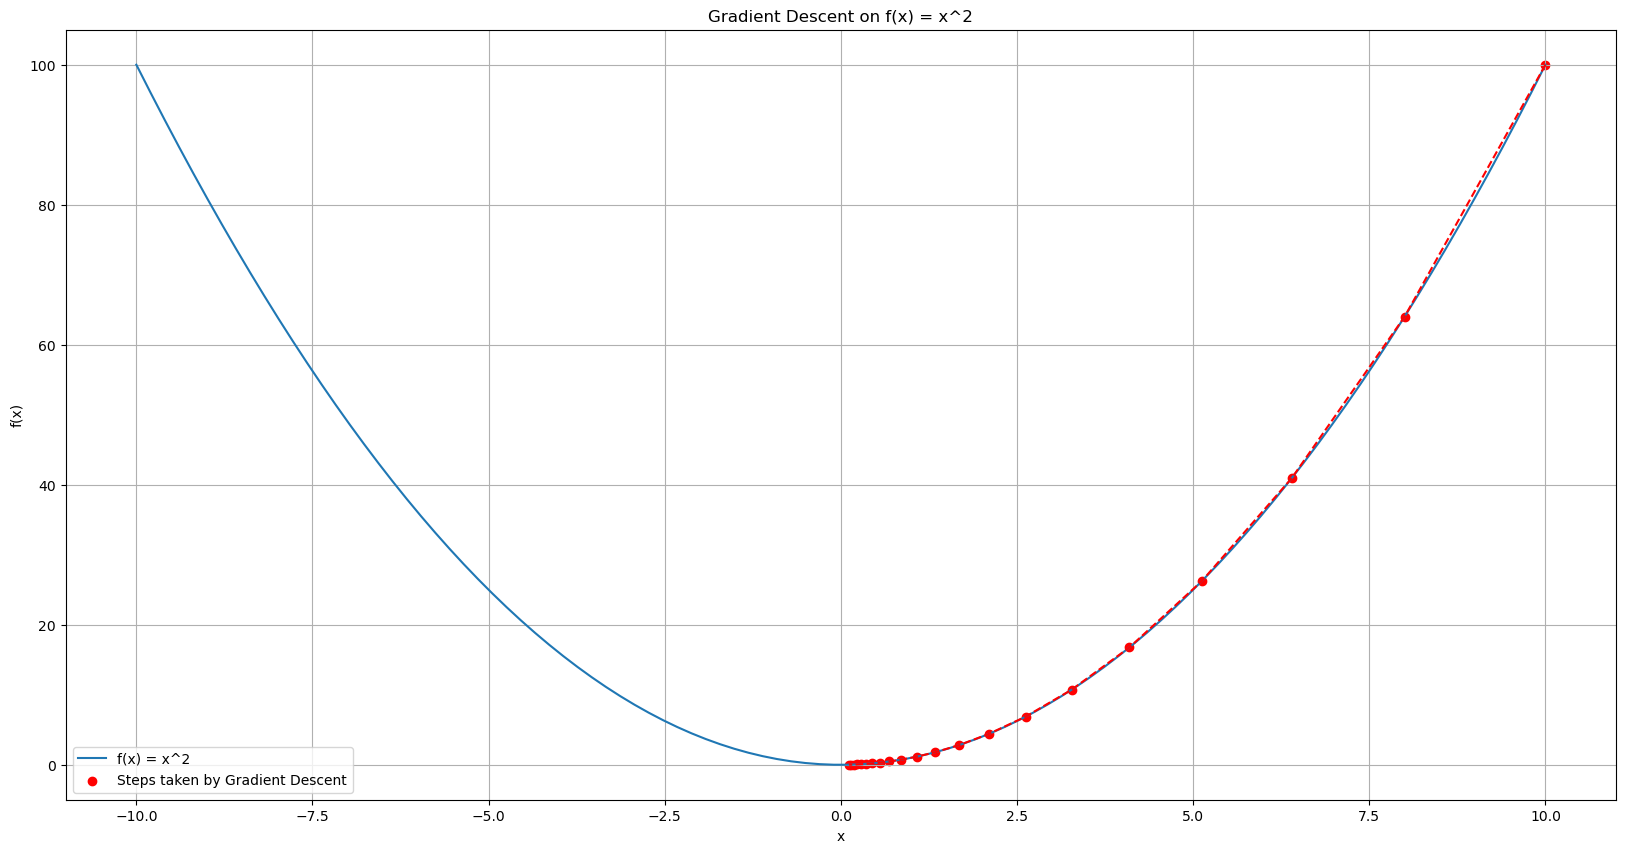

In [16]:

# 4. Visualizing Gradient Descent
# -----------------------------
# Let's now visualize the gradient descent algorithm on the function f(x) = x^2.
# We will plot the trajectory of the algorithm as it converges towards the minimum at x = 0.

# Run gradient descent starting from x = 10
x_history = gradient_descent(learning_rate=0.1, num_iterations=20, initial_guess=10)

# Plot the function and the steps taken by gradient descent
x = np.linspace(-10, 10, 100)
y = f(x)

plt.plot(x, y, label="f(x) = x^2")
plt.scatter(x_history, f(np.array(x_history)), color='red', label="Steps taken by Gradient Descent")
plt.plot(x_history, f(np.array(x_history)), linestyle="--", color="red")  # path of gradient descent
plt.title("Gradient Descent on f(x) = x^2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


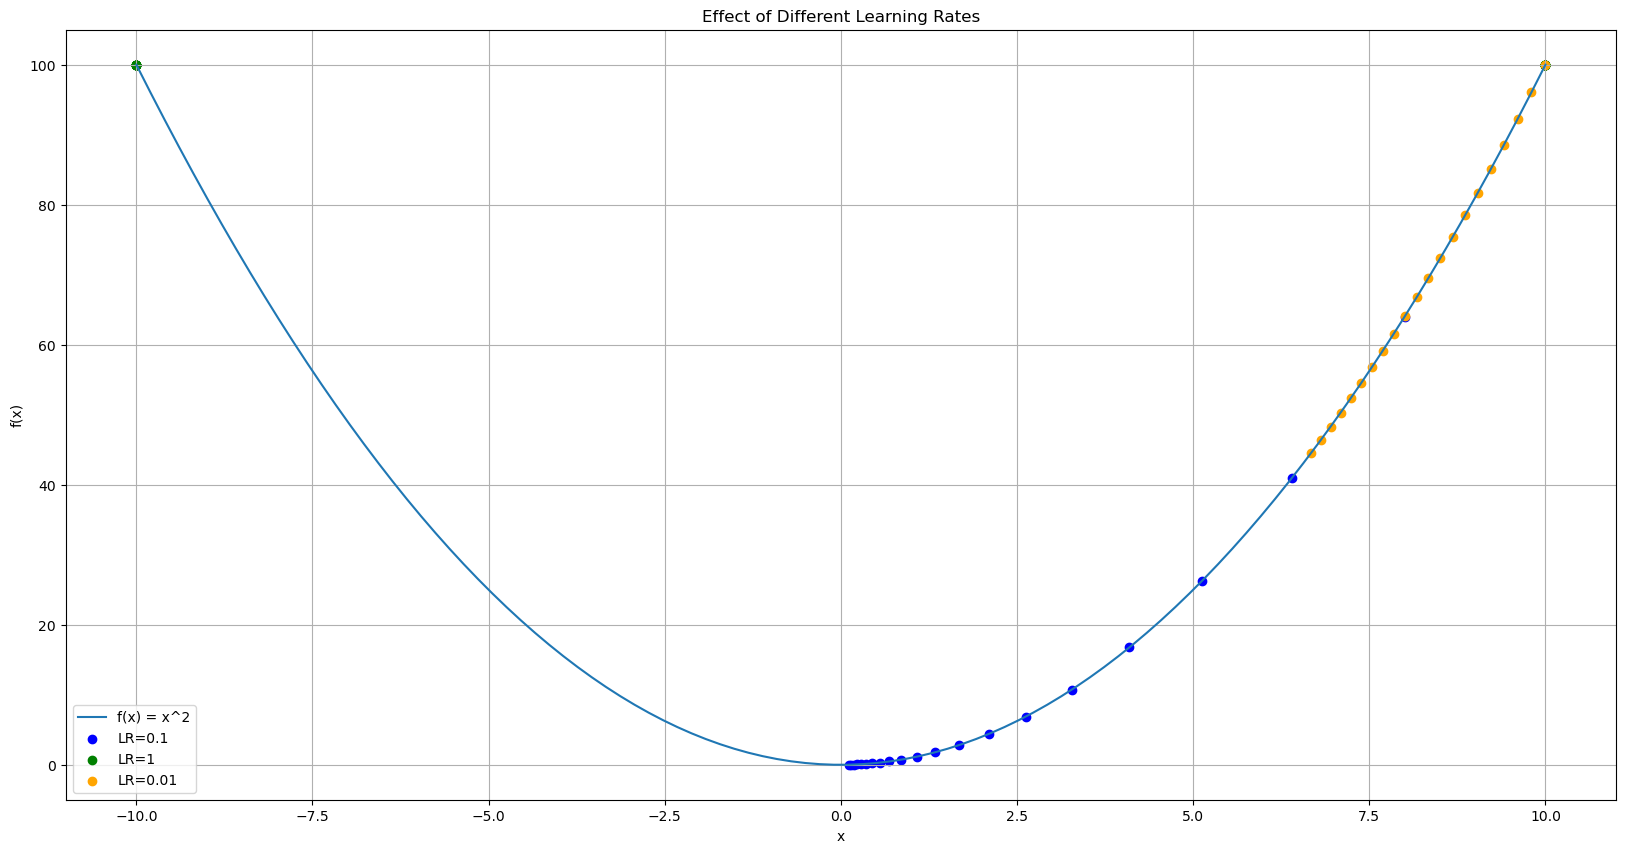

In [17]:

# 5. Effect of Learning Rate
# --------------------------
# The learning rate determines the size of the steps taken in each iteration. 
# If it's too large, the algorithm may overshoot the minimum. 
# If it's too small, it may take a long time to converge.

# Let's experiment with different learning rates.
def compare_learning_rates():
    """Compare the effect of different learning rates on gradient descent."""
    initial_guess = 10
    num_iterations = 20
    
    # Run gradient descent with different learning rates
    history_lr_01 = gradient_descent(learning_rate=0.1, num_iterations=num_iterations, initial_guess=initial_guess)
    history_lr_05 = gradient_descent(learning_rate=1, num_iterations=num_iterations, initial_guess=initial_guess)
    history_lr_001 = gradient_descent(learning_rate=0.01, num_iterations=num_iterations, initial_guess=initial_guess)
    
    # Plot the function and the steps taken by gradient descent
    x = np.linspace(-10, 10, 100)
    y = f(x)
    
    plt.plot(x, y, label="f(x) = x^2")
    plt.scatter(history_lr_01, f(np.array(history_lr_01)), color='blue', label="LR=0.1")
    plt.scatter(history_lr_05, f(np.array(history_lr_05)), color='green', label="LR=1")
    plt.scatter(history_lr_001, f(np.array(history_lr_001)), color='orange', label="LR=0.01")
    plt.title("Effect of Different Learning Rates")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

compare_learning_rates()




### Implementation

Let's try to implement this in Python. This looks like a long procedure. But the implementation is comparatively easy since we will vectorize all the equations. If you are unfamiliar with vectorization, read this [post](https://www.datascience.com/blog/straightening-loops-how-to-vectorize-data-aggregation-with-pandas-and-numpy/).

We will be using a student score dataset. In this particular dataset, we have math, reading, and writing exam scores of 1000 students. We will try to predict the score of the writing exam from math and reading scores. Since we have 2 features (input variables), let's start by importing our dataset.

In [18]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D

!wget "https://github.com/adityamoorthy2/Datasets_for_Summer_School/blob/main/student.csv?raw=true" -O student.csv

student = pd.read_csv('student.csv')
print(student.shape)
student.head()

--2025-07-01 13:49:54--  https://github.com/adityamoorthy2/Datasets_for_Summer_School/blob/main/student.csv?raw=true
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving github.com (github.com)... 20.207.73.82
Connecting to github.com (github.com)|20.207.73.82|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/adityamoorthy2/Datasets_for_Summer_School/raw/refs/heads/main/student.csv [following]
--2025-07-01 13:49:54--  https://github.com/adityamoorthy2/Datasets_for_Summer_School/raw/refs/heads/main/student.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/adityamoorthy2/Datasets_for_Summer_School/refs/heads/main/student.csv [following]
--2025-07-01 13:49:55--  https://raw.githubusercontent.com/adityamoorthy2/Datasets_for_Summer_School/refs/heads/main/student.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 18

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


We will get scores to an array.

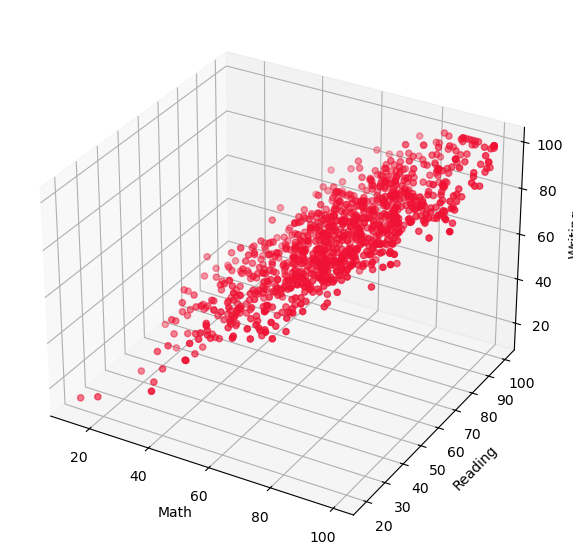

In [19]:
# math = data['Math'].values
# read = data['Reading'].values
# write = data['Writing'].values

# # Ploting the scores as scatter plot
# fig = plt.figure()
# ax = Axes3D(fig)
# ax.scatter(math, read, write, color='#ef1234')
# plt.show()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming 'data' is a DataFrame and contains the columns 'Math', 'Reading', 'Writing'

math = student['Math'].values
read = student['Reading'].values
write = student['Writing'].values

# Create a figure
fig = plt.figure(figsize=(10, 7))

# Create a 3D Axes object
ax = fig.add_subplot(111, projection='3d')

# Plot the scatter plot
ax.scatter(math, read, write, color='#ef1234')

# Set labels for each axis
ax.set_xlabel('Math')
ax.set_ylabel('Reading')
ax.set_zlabel('Writing')

# Show the plot
plt.show()


Now we will generate our X, Y and $\beta$.

In [23]:
m_student = len(math)

# Adding a column of ones for the intercept term
x0 = np.ones(m_student)

# Combining features into a single matrix
X_student = np.array([x0, math, read]).T

# Initial Coefficients
B = np.array([0, 0, 0])

# Target variable
Y_student = np.array(write)

# Learning Rate
alpha = 0.0001

We'll define our cost function.

In [24]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [25]:
inital_cost = cost_function(X_student, Y_student, B)
print(inital_cost)

2470.11


As you can see our initial cost is huge. Now we'll reduce our cost prediocally using Gradient Descent.

**Hypothesis:  $h_\beta(x) = \beta^Tx$**

**Loss: $(h_\beta(x)-y)$**


---

### 🔁 **Goal: Minimize the Cost Function**

You're trying to minimize the **cost function**, typically the **Mean Squared Error (MSE)** for linear regression:

$$
J(\boldsymbol{\beta}) = \frac{1}{2m} \sum_{i=1}^{m} (h_\beta(x^{(i)}) - y^{(i)})^2
$$

Where:

* $h_\beta(x) = \boldsymbol{\beta}^T x$ is your **hypothesis (prediction)**.
* $y$ is the actual target value.
* $m$ is the number of training examples.

---

### 🧮 **How the Gradient is Calculated**

You defined:

* **Hypothesis**:

  $$
  h_\beta(x) = \beta^T x = \sum_{j=0}^{n} \beta_j x_j
  $$

* **Loss (Error)**:

  $$
  (h_\beta(x) - y)
  $$

* **Gradient (for each parameter $\beta_j$)**:

  $$
  \frac{\partial J}{\partial \beta_j} = (h_\beta(x) - y) x_j
  $$

#### 👉 Why this works:

We’re taking the derivative of the loss function with respect to each $\beta_j$. The gradient tells us how much the cost function would increase or decrease if we nudged $\beta_j$ slightly.

---


**Gradient: $(h_\beta(x)-y)x_{j}$**

**Gradient Descent Updation: $\beta_j := \beta_j - \alpha(h_\beta(x)-y)x_{j})$**

In [26]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

Now we will compute final value of $\beta$

In [27]:
# 100000 Iterations
newB, cost_history = gradient_descent(X_student, Y_student, B, alpha, 100000)

# New Values of B
print(newB)

# Final Cost of new B
print(cost_history[-1])

[-0.47889172  0.09137252  0.90144884]
10.475123473539167


We can say that in this model,

$$S_{writing} = -0.47889172 + 0.09137252 * S_{math} + 0.90144884 * S_{reading}$$

There we have final hypothesis function of our model. Let's calculate **RMSE** and **\\(R^2\\) Score** of our model to evaluate.

In [29]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred_student = X_student.dot(newB)

print(rmse(Y_student, Y_pred_student))
print(r2_score(Y_student, Y_pred_student))

4.577143972727789
0.9097223273061553


We have very low value of RMSE score and a good \\(R^2\\) score. I guess our model was pretty good.

Now we will implement this model using scikit-learn.

### The scikit-learn Approach

scikit-learn approach is very similar to Simple Linear Regression Model and simple too. Let's implement this.

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# X and Y
X_student = np.array([math, read]).T
Y_student = np.array(write)

# Model Intialization
reg_student = LinearRegression()
# Data Fitting
reg_student = reg_student.fit(X_student, Y_student)
# Y Prediction
Y_pred_student = reg_student.predict(X_student)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y_student, Y_pred_student))
r2 = reg_student.score(X_student, Y_student)

print(rmse)
print(r2)

4.572887051836439
0.9098901726717316


# Trying Linear Regression with Salary Data

In [33]:
# Importing the libraries
import pandas as pd
import numpy as np

In [34]:
# Importing the dataset
!wget "https://github.com/adityamoorthy2/Datasets_for_Summer_School/blob/main/Salary_Data.csv?raw=true" -O Salary_Data.csv

salary = pd.read_csv('Salary_Data.csv')
X_salary = salary.iloc[:, :-1].values
Y_salary = salary.iloc[:, 1].values


--2025-07-01 13:54:59--  https://github.com/adityamoorthy2/Datasets_for_Summer_School/blob/main/Salary_Data.csv?raw=true
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving github.com (github.com)... 20.207.73.82
Connecting to github.com (github.com)|20.207.73.82|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/adityamoorthy2/Datasets_for_Summer_School/raw/refs/heads/main/Salary_Data.csv [following]
--2025-07-01 13:55:01--  https://github.com/adityamoorthy2/Datasets_for_Summer_School/raw/refs/heads/main/Salary_Data.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/adityamoorthy2/Datasets_for_Summer_School/refs/heads/main/Salary_Data.csv [following]
--2025-07-01 13:55:01--  https://raw.githubusercontent.com/adityamoorthy2/Datasets_for_Summer_School/refs/heads/main/Salary_Data.csv
Resolving raw.githubusercontent.com (raw.githubus

In [37]:
mean_x_salary = np.mean(X_salary)
mean_y_salary = np.mean(Y_salary)

In [38]:
m_salary = len(X_salary)

In [39]:
# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m_salary):
    numer += (X_salary[i] - mean_x_salary) * (Y_salary[i] - mean_y_salary)
    denom += (X_salary[i] - mean_x_salary) ** 2
b1 = numer / denom
b0 = mean_y_salary - (b1 * mean_x_salary)

# Print coefficients
print(b1, b0)

[9449.96232146] [25792.20019867]


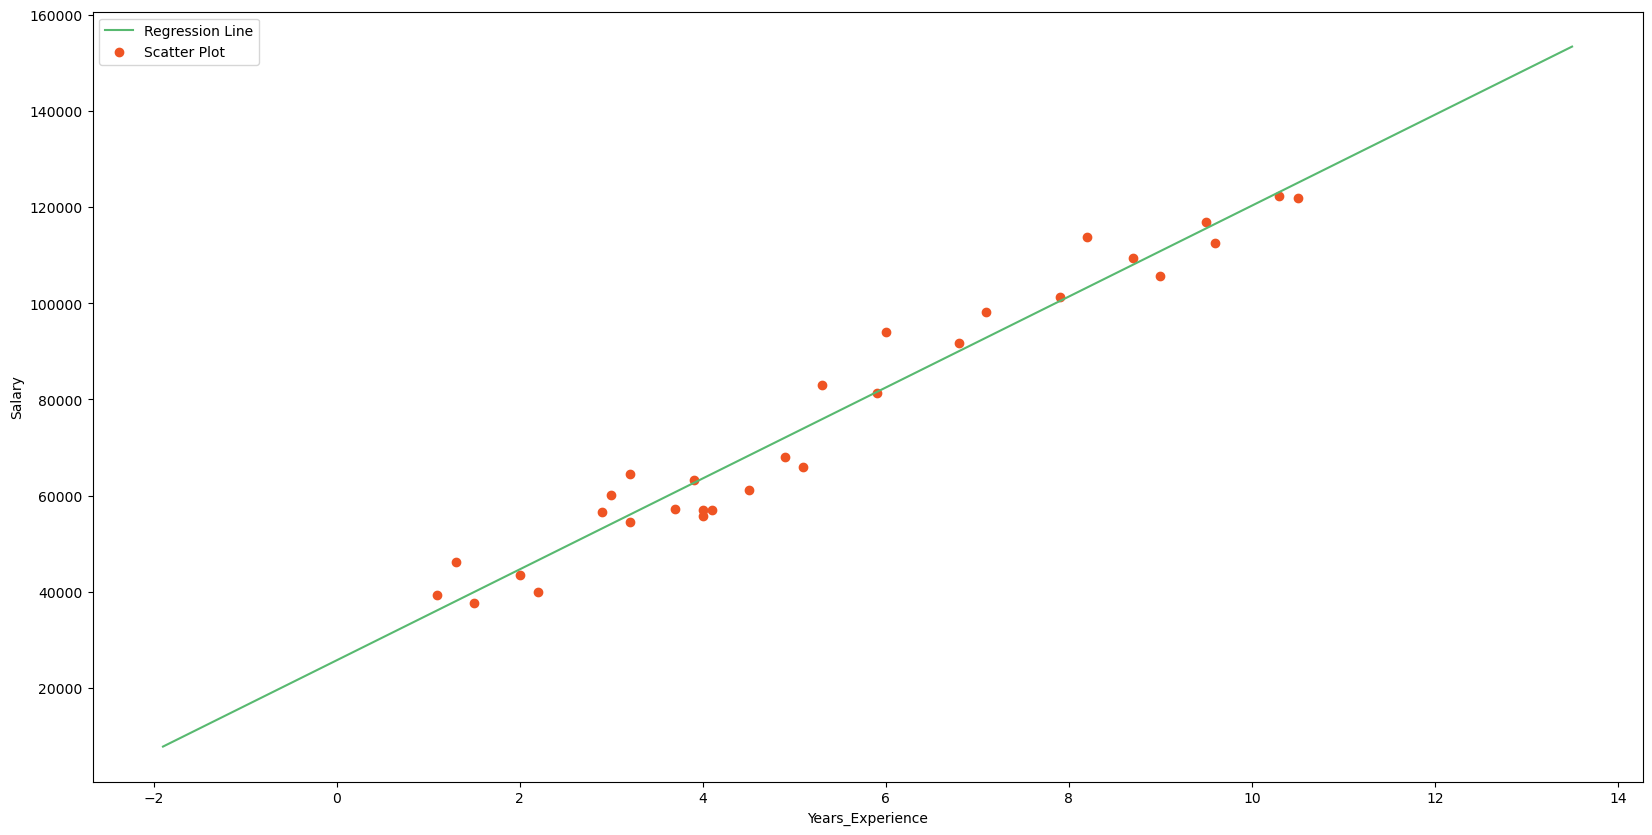

In [40]:
# Plotting Values and Regression Line
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

max_x_salary = np.max(X_salary) + 3
min_x_salary = np.min(X_salary) - 3

# Calculating line values x and y
x_salary = np.linspace(min_x_salary, max_x_salary, 1000)
y_salary = b0 + b1 * x_salary

# Ploting Line
plt.plot(x_salary, y_salary, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X_salary, Y_salary, c='#ef5423', label='Scatter Plot')

plt.xlabel('Years_Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [41]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(m_salary):
    y_pred_salary = b0 + b1 * X_salary[i]
    rmse += (Y_salary[i] - y_pred_salary) ** 2
rmse = np.sqrt(rmse/m_salary)
print(rmse)

[5592.04360876]


In [42]:
ss_t = 0
ss_r = 0
for i in range(m_salary):
    y_pred_salary = b0 + b1 * X_salary[i]
    ss_t += (Y_salary[i] - mean_y_salary) ** 2
    ss_r += (Y_salary[i] - y_pred_salary) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

[0.95695666]


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use Rank 1 matrix in scikit learn
X_salary = X_salary.reshape((m_salary, 1))
# Creating Model
reg_salary = LinearRegression()
# Fitting training data
reg_salary = reg_salary.fit(X_salary, Y_salary)
# Y Prediction
Y_pred_salary = reg_salary.predict(X_salary)

# Calculating RMSE and R2 Score
mse = mean_squared_error(Y_salary, Y_pred_salary)
rmse = np.sqrt(mse)
r2_score = reg_salary.score(X_salary, Y_salary)

print(np.sqrt(mse))
print(r2_score)

5592.043608760662
0.9569566641435086


# Importance of Train Test Split

In [53]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting data into train/test sets
from sklearn.linear_model import LinearRegression  # A simple linear regression model
from sklearn.metrics import mean_squared_error  # To evaluate the model performance


In [54]:
# Load the Breast Cancer dataset (binary classification: malignant vs benign)
from sklearn.datasets import load_breast_cancer

bcanc = load_breast_cancer()
X_bcanc = pd.DataFrame(bcanc.data, columns=bcanc.feature_names)
y_bcanc = pd.Series(bcanc.target)  # 0 = malignant, 1 = benign



In [55]:
# Split the data into training and testing sets
# 80% of the data will be used for training, 20% for testing
X_bcanc_train, X_bcanc_test, y_bcanc_train, y_bcanc_test = train_test_split(
    X_bcanc, y_bcanc, test_size=0.2, random_state=42
)

# This split is crucial! It helps evaluate how well the model generalizes to unseen data.
# Without a test set, we can't reliably measure the model's performance on new inputs.


In [56]:
# Initialize and train a linear regression model using the training data
model = LinearRegression()
model.fit(X_bcanc_train, y_bcanc_train)

# The model has now learned the relationship between features and the target using only training data


LinearRegression()

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
# Step 5: Evaluate on a SMALL SUBSET of training data
# We'll take just 10% of the training data as the "fake test"
X_bcanc_train_sample = X_bcanc_train.sample(frac=0.1, random_state=3)
y_bcanc_train_sample = y_bcanc_train.loc[X_bcanc_train_sample.index]

# Predict and evaluate
y_bcanc_pred_train_sample = model.predict(X_bcanc_train_sample)
# convert predictions to binary classification (0 or 1)
y_bcanc_pred_train_sample = np.where(y_bcanc_pred_train_sample >= 0.6, 1, 0)
accuracy_train_sample = accuracy_score(y_bcanc_train_sample, y_bcanc_pred_train_sample)
print("Accuracy on Training Sample (10% of training set):", accuracy_train_sample)


Accuracy on Training Sample (10% of training set): 1.0


In [59]:
# Step 6: Evaluate on actual test set
y_bcanc_pred_test = model.predict(X_bcanc_test)
# convert predictions to binary classification (0 or 1)
y_bcanc_pred_test = np.where(y_bcanc_pred_test >= 0.6, 1, 0)

accuracy_test = accuracy_score(y_bcanc_test, y_bcanc_pred_test)
print("Accuracy on Test Set (unseen data):", accuracy_test)

Accuracy on Test Set (unseen data): 0.9385964912280702


- You will likely see a **higher accuracy** on the training sample compared to the test set.
- This shows that the model performs better on data it has seen during training.
- But this is **not a realistic estimate** of performance on future, unseen data.


The size of the train-test split plays a critical role in both training the model effectively and evaluating it reliably.

#### ⚖️ Common Split Ratios
- **80% Train / 20% Test** → Most commonly used and balanced.
- **70% Train / 30% Test** → Provides a larger test set, useful for smaller datasets.
- **90% Train / 10% Test** → Maximizes training data but leaves little room for evaluation.

#### 🚨 Why You Shouldn't Use a Test Set That's Too Small
- A **very small test set (e.g., 5–10%)** may not capture the diversity or variability of the real-world data.
- It can lead to **high variance** in evaluation metrics — meaning your accuracy or loss might fluctuate a lot depending on which samples end up in the test set.
- You might **miss edge cases**, outliers, or rare examples that the model struggles with.

#### 🧪 Why You Shouldn't Use a Test Set That's Too Large
- A **very large test set (e.g., 40–50%)** reduces the amount of data the model has to learn from.
- This can cause **underfitting** — the model doesn't learn enough patterns and performs poorly.
- Especially problematic for small datasets, where every training sample matters.

#### ✅ Best Practices:
- Use **80/20** or **70/30** for most datasets.
- For **very small datasets**, consider **cross-validation** instead of a simple train-test split.
- Ensure both sets are representative of the overall distribution (use `stratify=y` in `train_test_split` for classification problems).

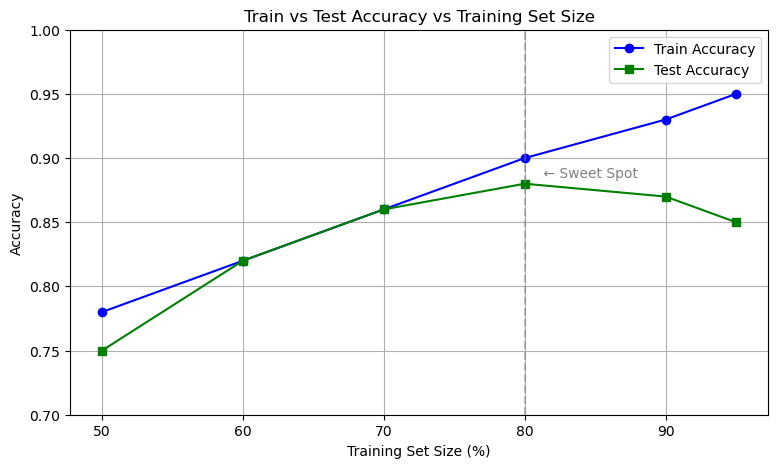

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Train sizes (%)
train_sizes = np.array([50, 60, 70, 80, 90, 95])

# Conceptual (mocked) values
train_accuracy =     [0.78, 0.82, 0.86, 0.90, 0.93, 0.95]
test_accuracy =      [0.75, 0.82, 0.86, 0.88, 0.87, 0.85]

# Plotting
plt.figure(figsize=(9, 5))
plt.plot(train_sizes, train_accuracy, marker='o', label='Train Accuracy', color='blue')
plt.plot(train_sizes, test_accuracy, marker='s', label='Test Accuracy', color='green')

plt.title("Train vs Test Accuracy vs Training Set Size")
plt.xlabel("Training Set Size (%)")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)
plt.grid(True)
plt.legend()

# Highlight sweet spot
plt.axvline(x=80, color='gray', linestyle='--', alpha=0.5)
plt.text(81, 0.885, ' ← Sweet Spot', color='gray')

plt.show()


- At 50–60%: Model underfits — train accuracy is low, test accuracy also low.
- At 70–90%: Balanced generalization — high and similar train and test accuracy.
- At 95%: Model continues to fit training data well, but test set is too small to give reliable estimates.

✅ This clearly illustrates why both **training set size** and **test set quality** matter for real-world model evaluation.


# Coming Back to Salary Data

In [61]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_salary_train, X_salary_test, y_salary_train, y_salary_test = train_test_split(X_salary, Y_salary, test_size = 0.2, random_state = 0)

In [62]:

# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_salary_train, y_salary_train)


LinearRegression()

In [63]:
# Predicting the Test set results
#y_pred = regressor.predict(X_test)

In [64]:
# Finding the R-Squared value for this model
print(regressor.score(X_salary_test, y_salary_test))


0.988169515729126


# Introduction to Logistic Regression

In [ ]:
# Importing libraries
import time, psutil, os, math
from tqdm.contrib import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import train_test_split

/home/shleekshu/miniconda3/envs/fairtest/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Introduction

**Classification.** In [statistics](https://en.wikipedia.org/wiki/Statistics) and [machine learning](https://en.wikipedia.org/wiki/Machine_learning), [classification](https://en.wikipedia.org/wiki/Statistical_classification) refers to a type of [supervised learning](https://en.wikipedia.org/wiki/Supervised_learning). For this task, training data with known class labels are given and is used to develop a [classification rule](https://en.wikipedia.org/wiki/Classification_rule) for assigning new unlabeled data to one of the classes. A special case of the task is [binary classification](https://en.wikipedia.org/wiki/Binary_classification), which involves only two classes. Some examples:

- Classifying an email as `spam` or `non-spam`
- Classifying a tumor as `benign` or `malignant`

The algorithms that sort unlabeled data into labeled classes are called *classifiers*. Loosely speaking, the [sorting hat](https://en.wikipedia.org/wiki/Magical_objects_in_Harry_Potter#Sorting_Hat) from [Hogwarts](https://en.wikipedia.org/wiki/Hogwarts) can be thought of as a classifier that sorts incoming students into four distinct houses. In real life, some common classifiers are [logistic regression](https://en.wikipedia.org/wiki/Logistic_regression), [k-nearest neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm), [decision tree](https://en.wikipedia.org/wiki/Decision_tree_learning), [random forest](https://en.wikipedia.org/wiki/Random_forest), [support vector machine](https://en.wikipedia.org/wiki/Support-vector_machine), [naive Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier), [linear discriminant analysis](https://en.wikipedia.org/wiki/Linear_discriminant_analysis), [stochastic gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent), [XGBoost](https://en.wikipedia.org/wiki/XGBoost), [AdaBoost](https://en.wikipedia.org/wiki/AdaBoost) and [neural networks](https://en.wikipedia.org/wiki/Artificial_neural_network).


## Logistic Function


We use [logistic function](https://en.wikipedia.org/wiki/Logistic_function) (sometimes simply referred to as the *sigmoid*), which is given by

$$ g(x) = \frac{1}{1+e^{-x}}, $$

for $x \in \mathbb{R}$. The next two code blocks construct and plot this function.

In [ ]:
# Logistic function
def logistic(x):
    """
    Computes the logistic function applied to an input scalar/array
    Args:
        x (scalar/ndarray): scalar or numpy array of any size
    Returns:
        y (scalar/ndarray): logistic function applied to x, has the same shape as x
    """
    y = 1 / (1 + np.exp(-x))
    return y

x, x_arr = 0, np.array([-5, -1, 1, 5])
print(f"logistic({x}) = {logistic(x)}")
print(f"logistic({x_arr}) = {logistic(x_arr)}")

logistic(0) = 0.5
logistic([-5 -1  1  5]) = [0.00669285 0.26894142 0.73105858 0.99330715]


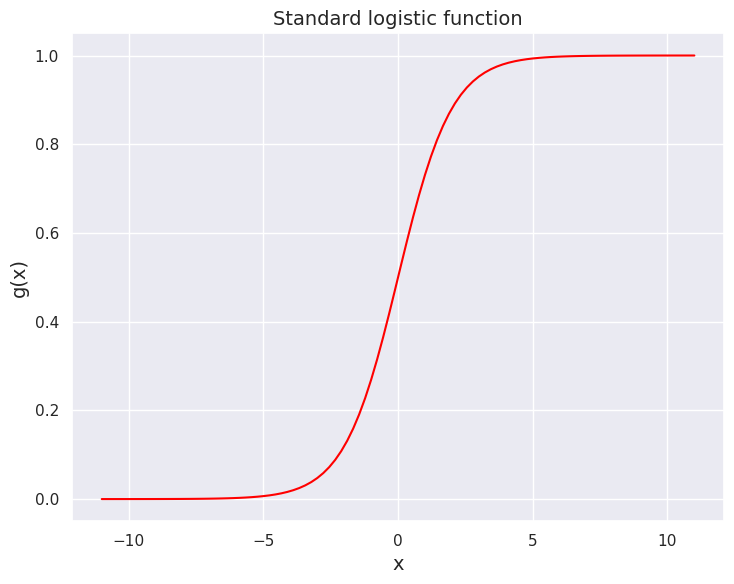

In [ ]:
# Plotting the logistic function
plt.figure(figsize = (7.5, 6))
x = np.linspace(-11, 11, 100)
plt.plot(x, logistic(x), color = 'red')
plt.xlabel("x", fontsize = 14)
plt.ylabel("g(x)", fontsize = 14)
plt.title("Standard logistic function", fontsize = 14)
plt.tight_layout()
plt.show()

## Log Loss

The `loss function`, which corresponds to the *true value* and *predicted value* of a single observation. The `cost function` can be thought of as *expected loss* or *average loss* over a group of observations. Contrary to linear regression, which employs `squared loss`, logistic regression makes use of the `log loss` function, given by

$$ L(y, y') = -y \log\left(y'\right) - \left(1 - y\right) \log\left(1 - y'\right), $$

where $y$ is the true value of a binary target (taking values $0$ or $1$) and $y'$ is the prediction, which can be thought of as the predicted probability of $y$ being $1$. Observe that the loss is $0$, when the true value and predicted value agree with each other, i.e. $L(0, 0) = L(1, 1) = 0$. On the other hand, the loss explodes towards infinity if the predicted value approaches $1$ when the true value is $0$, or it approaches $0$ when the true value is $1$. In the next couple of code blocks, we construct the function to compute log loss and plot it for $y = 0$ and $y = 1$. Since the true values (labels) are always $0$ or $1$, we do not need to pay heed to the behaviour of the function $L$ for other values of $y$.

In [ ]:
# Log loss
def log_loss(y, y_dash):
    """
    Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)
    Args:
      y      (scalar): true value (0 or 1)
      y_dash (scalar): predicted value (probability of y being 1)
    Returns:
      loss (float): nonnegative loss corresponding to y and y_dash
    """
    loss = - (y * np.log(y_dash)) - ((1 - y) * np.log(1 - y_dash))
    return loss

y, y_dash = 0, 0.6
print(f"log_loss({y}, {y_dash}) = {log_loss(y, y_dash)}")

log_loss(0, 0.6) = 0.916290731874155


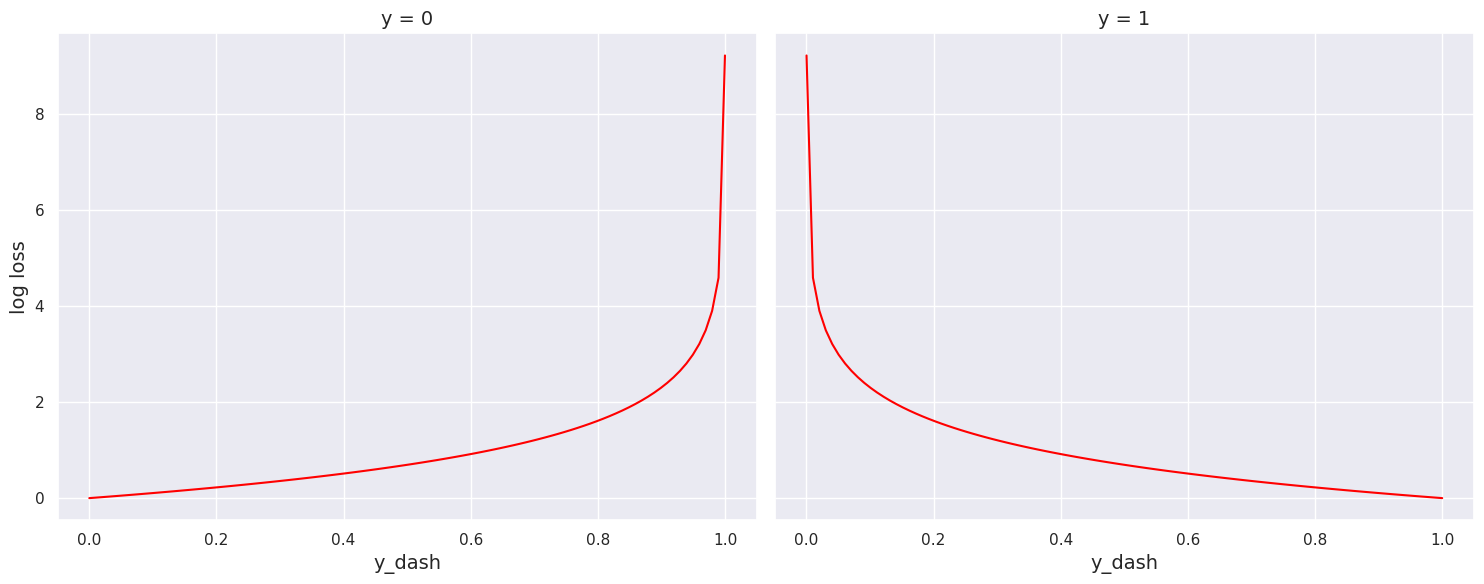

In [ ]:
# Log loss for y = 0 and y = 1
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
y_dash = np.linspace(0.0001, 0.9999, 100)
ax[0].plot(y_dash, log_loss(0, y_dash), color = 'red')
ax[0].set_title("y = 0", fontsize = 14)
ax[0].set_xlabel("y_dash", fontsize = 14)
ax[0].set_ylabel("log loss", fontsize = 14)
ax[1].plot(y_dash, log_loss(1, y_dash), color = 'red')
ax[1].set_title("y = 1", fontsize = 14)
ax[1].set_xlabel("y_dash", fontsize = 14)
plt.tight_layout()
plt.show()

The plots sync with the intuition that loss should be minimum when the predicted value (probability) matches the true value $(0$ or $1)$, and should increase as the two values drift apart.

## Cost Function

Let $\mathbf{y} = (y_1, y_2, \cdots, y_n)$ be the true values $(0$ or $1)$ and $\mathbf{y'} = (y_1', y_2', \cdots, y_n')$ be the corresponding predictions (probabilities). Then, the *cost function* is given by the average loss:

$$ C(\mathbf{y}, \mathbf{y'}) = \frac{1}{m}\sum_{i = 1}^m L(y_i, y_i'). $$

We construct the function to compute cost in the following two code blocks. An important structural distinction from the log loss function is that here the arguments `y` and `y_dash` are vectors, not scalars.

In [ ]:
# Cost function - using vectorization
def cost_func_vec(y, y_dash):
    """
    Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)
    Args:
      y      (array_like, shape (m,)): array of true values (0 or 1)
      y_dash (array_like, shape (m,)): array of predicted values (probability of y being 1)
    Returns:
      cost (float): nonnegative cost corresponding to y and y_dash
    """
    assert len(y) == len(y_dash), "Length of true values and length of predicted values do not match"
    m = len(y)
    loss_vec = np.array([log_loss(y[i], y_dash[i]) for i in range(m)])
    cost = np.dot(loss_vec, np.ones(m)) / m
    return cost

y, y_dash = np.array([0, 1, 0]), np.array([0.4, 0.6, 0.25])
print(cost_func_vec(y, y_dash))

0.43644443999458743


Let us assume that we want to predict $y$ based on $n$ features. In this setup, a logistic regression model is characterized by $n+1$ parameters:

- weight parameters $\mathbf{w} = (w_1, w_2, \cdots, w_n)$
- bias parameter $b$

Note that, the [dot product](https://en.wikipedia.org/wiki/Dot_product) of two vectors $\mathbf{a} = (a_1, a_2, \cdots, a_n)$ and $\mathbf{b} = (b_1, b_2, \cdots, b_n)$ is given by $\mathbf{a} \cdot \mathbf{b} = \sum_{i=1}^n a_ib_i$. It is a scalar value and evidently, $\mathbf{a} \cdot \mathbf{b} = \mathbf{b} \cdot \mathbf{a}$. Given the realized values of $n$ features $\mathbf{x} = (x_1, x_2, \cdots, x_n)$, the model feeds $\mathbf{x} \cdot \mathbf{w} + b$ to the logistic function $g$, and projects the output as the predicted probability of $y = 1$. Concretely, we have

$$ y' = g\left(\mathbf{x} \cdot \mathbf{w} + b\right) = \frac{1}{1 + e^{-\left(\mathbf{x} \cdot \mathbf{w} + b\right)}}. \tag{1} $$

Let us consider the situation of $m$ observations, with the $i$th observation having feature values $\mathbf{x_i} = (x_{i,1}, x_{i,2}, \cdots, x_{i,n})$, true target value $y_i$ and predicted probabilities $y_i' = g\left(\mathbf{x_i} \cdot \mathbf{w} + b\right)$. Stacking them up, we obtain the feature matrix $\mathbf{X}$, target vector $\mathbf{y}$ and the vector of predicted probability $\mathbf{y'}$, as follows:

$$ \mathbf{X} = \begin{pmatrix}
\mathbf{x_1} \newline
\mathbf{x_2} \newline
\vdots \newline
\mathbf{x_m}
\end{pmatrix} = \begin{pmatrix}
x_{1,1} & x_{1,2} & \cdots & x_{1,n} \newline
x_{2,1} & x_{2,2} & \cdots & x_{2,n} \newline
\vdots & \vdots & \ddots & \vdots \newline
x_{m,1} & x_{m,2} & \cdots & x_{m,n}
\end{pmatrix},\;\;\;\;
\mathbf{y} = \begin{pmatrix}
y_1 \newline
y_2 \newline
\vdots \newline
y_m
\end{pmatrix},\;\;\;\;
\mathbf{y'} = \begin{pmatrix}
g\left(\mathbf{x_1} \cdot \mathbf{w} + b\right) \newline
g\left(\mathbf{x_2} \cdot \mathbf{w} + b\right) \newline
\vdots \newline
g\left(\mathbf{x_n} \cdot \mathbf{w} + b\right)
\end{pmatrix}. \tag{2} $$

Now, we are in a position to rewrite the cost function in terms of model parameters:

$$ J\left(\mathbf{w}, b\right) := C\left(\mathbf{y}, \mathbf{y'} \,\vert\, \mathbf{X}, \mathbf{w}, b \right) = \frac{1}{m}\sum_{i = 1}^m L\left(y_i, \frac{1}{1 + e^{-\left(\mathbf{x_i} \cdot \mathbf{w} + b\right)}}\right) = \frac{1}{m}\sum_{i = 1}^m \left[ -y_i \log\left(\frac{1}{1 + e^{-\left(\mathbf{x_i} \cdot \mathbf{w} + b\right)}}\right) - \left(1 - y_i\right) \log\left(1 - \frac{1}{1 + e^{-\left(\mathbf{x_i} \cdot \mathbf{w} + b\right)}}\right) \right]. \tag{3} $$

Note that $J\left(\mathbf{0}, 0\right) = \log{2}$ for every input data $\mathbf{X}$ (features) and $\mathbf{y}$ (target). We construct a function to compute the cost, given data and model parameters, in the general setup of $n$ features (first using for loop, then using vectorization). Then, we visualize the cost function for a simplified setup, consisting of a single feature $x$. In this setup, the model involves two parameters only, the weight parameter $w$ and the bias parameter $b$.

The code for logistic function $g$ is constructed in such a way that, if applied on an array, it acts separately on each component and returns an array. Using this, it follows from $(2)$ that

$$ \mathbf{y'} = g\left(\mathbf{X} \mathbf{w} + b \mathbf{1} \right), $$

where $\mathbf{1}$ has the same dimension as that of $\mathbf{X} \mathbf{w}$. We use [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication) in computing $\mathbf{X} \mathbf{w}$, [scalar multiplication of a vector](https://en.wikipedia.org/wiki/Scalar_multiplication) in computing $b \mathbf{1}$ and add them up using [vector addition](https://en.wikipedia.org/wiki/Euclidean_vector#Addition_and_subtraction). This representation leads to a much faster vectorized implementation of computing the cost function in terms of model parameters.

In [ ]:
# Function to compute cost function in terms of model parameters - using vectorization
def cost_logreg_vec(X, y, w, b):
    """
    Computes the cost function, given data and model parameters
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): array of true values of target (0 or 1)
      w (array_like, shape (n,)): weight parameters of the model      
      b (float)                 : bias parameter of the model
    Returns:
      cost (float): nonnegative cost corresponding to y and y_dash 
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    z = np.matmul(X, w) + (b * np.ones(m))
    y_dash = logistic(z)
    cost = cost_func_vec(y, y_dash)
    return cost

X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"cost_logreg_vec(X = {X}, y = {y}, w = {w}, b = {b}) = {cost_logreg_vec(X, y, w, b)}")

cost_logreg_vec(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = 5.500008350784906


[Text(0.5, 0, 'w'), Text(0.5, 0.5, 'b')]

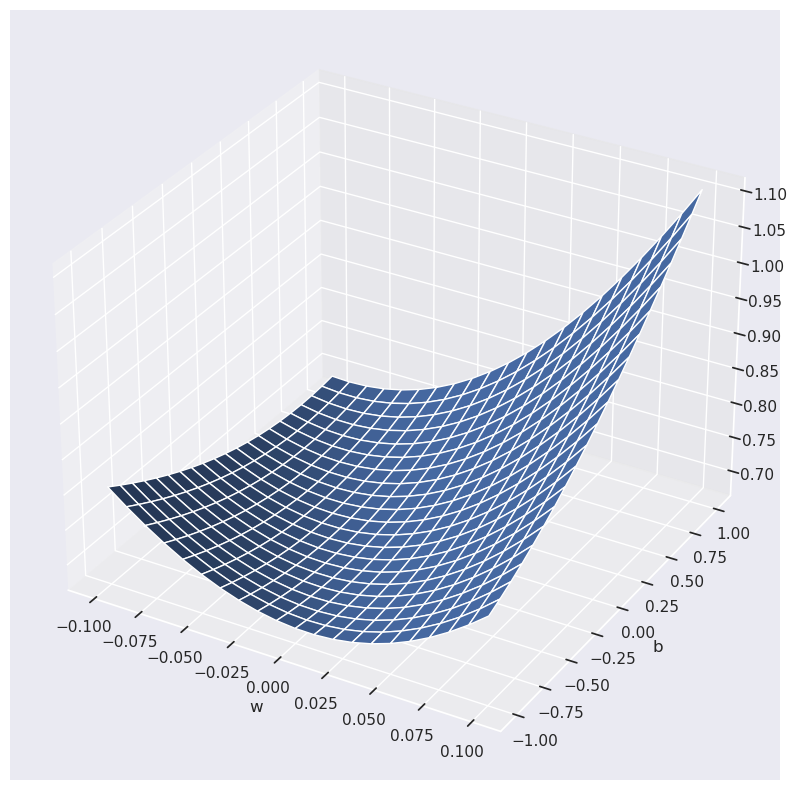

In [ ]:
# Plotting the cost function against model parameters
from mpl_toolkits.mplot3d import Axes3D
w, b = np.meshgrid(np.linspace(-0.1, 0.1, 21), np.linspace(-1, 1, 21))
X = np.array([1.56, 0.76 , 0.08, 9.71, 4.65, 4.35, 7.34, 0.91, 9.82, 9.05]).reshape((10, 1))
y = np.array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0])
cost = np.array([[cost_logreg_vec(X, y, np.array([w0]), b0) for b0 in b[:, 0]] for w0 in w[0]])
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')
ax.plot_surface(w, b, cost)
ax.set(xlabel = "w", ylabel = "b")

The prediction $y'$ in $(1)$ can be converted to a decision by using a threshold value. For instance, suppose we take the threshold to be $0.5$. Then, we may classify the observation to class $1$ if $y' \geq 0.5$, and to class $0$ otherwise. The problem, however, is that we do not know the model parameters $\mathbf{w}$ and $b$, and hence cannot compute $y'$ directly. First, we have to fit the model by finding the best fitting parameters. Observe that, given the training data, $C\left(\mathbf{y}, \mathbf{y'}\right)$ depends on $\mathbf{w}$ and $b$ only. A reasonable strategy, therefore, is:

$$ \text{To minimise } J\left(\mathbf{w}, b\right), \text{ with respect to } \mathbf{w} \text{ and } b. $$

We shall employ the [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) [algorithm](https://en.wikipedia.org/wiki/Algorithm) to solve this [optimization](https://en.wikipedia.org/wiki/Mathematical_optimization) problem.

## Gradient Descent


**The algorithm.** In the context of minimising the cost function $J$, with respect to the model parameters $\mathbf{w}$ and $b$, the gradient descent algorithm is given by:

$$ \begin{align*}
& \text{repeat until convergence:}\; \{ \newline
& w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j},\; \text{ for } j = 1, 2, \ldots, n; \newline
& b := b -  \alpha \frac{\partial J(\mathbf{w}, b)}{\partial b}. \tag{4} \newline
& \}
\end{align*} $$

where $\alpha$ is the [learning rate](https://en.wikipedia.org/wiki/Learning_rate), and the parameters $\mathbf{w} = (w_1, w_2, \cdots, w_n)$ and $b$ are updated simultaniously in each iteration.

**Computing gradient.** Before we can implement the gradient descent algorithm, we need to compute the gradients first! From $(3)$, we can compute the partial derivatives of $J$ with respect to $w_j$ and $b$ as follows:

$$ \begin{align*}
& \frac{\partial J(\mathbf{w},b)}{\partial w_j} = \frac{1}{m} \sum\limits_{i = 1}^m \left(\frac{1}{1 + e^{-\left(\mathbf{x_i} \cdot \mathbf{w} + b\right)}} - y_i\right) x_{i,j},\;\; \text{ for } j = 1, 2, \ldots, n; \newline
& \frac{\partial J(\mathbf{w}, b)}{\partial b} = \frac{1}{m} \sum\limits_{i = 1}^m \left(\frac{1}{1 + e^{-\left(\mathbf{x_i} \cdot \mathbf{w} + b\right)}} - y_i\right).
\end{align*} $$

The next code blocks construct a function to compute these gradients using vectorization.

In [ ]:
# Function to compute gradients of the cost function with respect to model parameters - using vectorization
def grad_logreg_vec(X, y, w, b): 
    """
    Computes gradients of the cost function with respect to model parameters
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): array of true values of target (0 or 1)
      w (array_like, shape (n,)): weight parameters of the model      
      b (float)                 : bias parameter of the model
    Returns:
      grad_w (array_like, shape (n,)): gradients of the cost function with respect to the weight parameters
      grad_b (float)                 : gradient of the cost function with respect to the bias parameter
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    y_dash = logistic(np.matmul(X, w) + b * np.ones(m))
    grad_w = np.matmul(y_dash - y, X) / m
    grad_b = np.dot(y_dash - y, np.ones(m)) / m
    return grad_w, grad_b

X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"grad_logreg_vec(X = {X}, y = {y}, w = {w}, b = {b}) = {grad_logreg_vec(X, y, w, b)}")

grad_logreg_vec(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = (array([-4.99991649,  4.99991649]), np.float64(0.4999916492890759))


Armed with the required functions, we can now implement the gradient descent algorithm, given in $(4)$. 

In [ ]:
# Gradient descent algorithm for logistic regression
def grad_desc(X, y, w, b, alpha, n_iter, show_cost = True, show_params = False): 
    """
    Implements batch gradient descent algorithm to learn and update model parameters
    with prespecified number of interations and learning rate
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): true values of target (0 or 1)
      w (array_like, shape (n,)): initial value of weight parameters
      b (scalar)                : initial value of bias parameter
      cost_func                 : function to compute cost
      grad_func                 : function to compute gradients of cost with respect to model parameters
      alpha (float)             : learning rate
      n_iter (int)              : number of iterations
    Returns:
      w (array_like, shape (n,)): updated values of weight parameters
      b (scalar)                : updated value of bias parameter
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    cost_history, params_history = [], []
    for i, j in itertools.product(range(n_iter), range(1)):
        grad_w, grad_b = grad_logreg_vec(X, y, w, b)   
        w += - alpha * grad_w
        b += - alpha * grad_b
        cost =  cost_logreg_vec(X, y, w, b)
        cost_history.append(cost)
        params_history.append([w, b])
        if show_cost == True and show_params == False and (i % math.ceil(n_iter / 10) == 0 or i == n_iter - 1):
            print(f"Iteration {i:6}:    Cost  {float(cost_history[i]):3.4f}")
        if show_cost == True and show_params == True and (i % math.ceil(n_iter / 10) == 0 or i == n_iter - 1):
            print(f"Iteration {i:6}:    Cost  {float(cost_history[i]):3.4f},    Params  {params_history[i]}")
    return w, b, cost_history, params_history

X, y, w, b, alpha, n_iter = np.array([[0.1, 0.2], [-0.1, 0.1]]), np.array([1, 0]), np.array([0., 0.]), 0., 0.1, 100000
w_out, b_out, cost_history, params_history = grad_desc(X, y, w, b, alpha, n_iter, show_cost = True, show_params = True)

  5%|▍         | 4695/100000 [00:00<00:05, 16926.54it/s]

Iteration      0:    Cost  0.6928,    Params  [array([0.005 , 0.0025]), np.float64(0.0)]


 14%|█▍        | 14307/100000 [00:00<00:04, 18534.09it/s]

Iteration  10000:    Cost  0.0867,    Params  [array([19.30073125,  9.43918518]), np.float64(-1.4078696585361676)]


 23%|██▎       | 22744/100000 [00:01<00:05, 13478.40it/s]

Iteration  20000:    Cost  0.0430,    Params  [array([25.11290735, 12.28127422]), np.float64(-1.8345297190719223)]


 32%|███▏      | 31584/100000 [00:02<00:05, 11903.23it/s]

Iteration  30000:    Cost  0.0283,    Params  [array([28.51960605, 13.947125  ]), np.float64(-2.084520137444322)]


 42%|████▏     | 41593/100000 [00:02<00:03, 15368.34it/s]

Iteration  40000:    Cost  0.0211,    Params  [array([30.9258698 , 15.12377399]), np.float64(-2.261072754000601)]


 54%|█████▍    | 53803/100000 [00:03<00:03, 14511.65it/s]

Iteration  50000:    Cost  0.0168,    Params  [array([32.78441957, 16.03259549]), np.float64(-2.397428663482232)]


 63%|██████▎   | 63145/100000 [00:04<00:03, 12022.78it/s]

Iteration  60000:    Cost  0.0139,    Params  [array([34.29765304, 16.77255979]), np.float64(-2.5084448658725664)]


 73%|███████▎  | 73080/100000 [00:05<00:01, 13708.64it/s]

Iteration  70000:    Cost  0.0119,    Params  [array([35.57340822, 17.39639871]), np.float64(-2.602035975617821)]


 84%|████████▎ | 83586/100000 [00:06<00:01, 12966.24it/s]

Iteration  80000:    Cost  0.0104,    Params  [array([36.67589743, 17.93551157]), np.float64(-2.682914282617459)]


 91%|█████████▏| 91492/100000 [00:06<00:00, 14091.52it/s]

Iteration  90000:    Cost  0.0092,    Params  [array([37.64642667, 18.4100967 ]), np.float64(-2.7541108549220774)]


100%|██████████| 100000/100000 [00:07<00:00, 13475.25it/s]

Iteration  99999:    Cost  0.0083,    Params  [array([38.51304248, 18.83386869]), np.float64(-2.8176836626325836)]


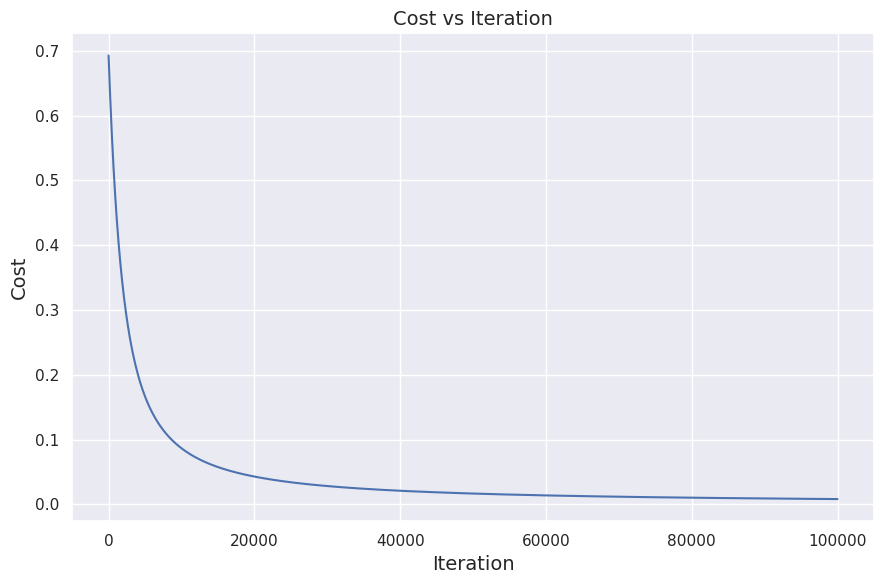

In [ ]:
# Plotting cost over iteration
plt.figure(figsize = (9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Cost", fontsize = 14)
plt.title("Cost vs Iteration", fontsize = 14)
plt.tight_layout()
plt.show()

In [ ]:
!wget "https://github.com/adityamoorthy2/Datasets_for_Summer_School/blob/main/apple-orange-dataset.csv?raw=true" -O apple-orange-dataset.csv

data = pd.read_csv('apple-orange-dataset.csv')

y = data['label']

features = ['weight','diameter']
X = data[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=2)

In [ ]:
data.head()

,label,weight,diameter
0,1,136,10.557432
1,1,192,11.292246
2,1,112,10.120368
3,1,185,8.786955
4,1,129,10.070343


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

We normalize the data, so that each column has values in the similar scale.

In [ ]:
# Min-Max normalization
for col in X_train.columns:
    if (X_train[col].dtypes == 'int64' or X_train[col].dtypes == 'float64') and X_train[col].nunique() > 1:
        X_train[col] = (X_train[col] - X_train[col].min()) / (X_train[col].max() - X_train[col].min())
for col in X_test.columns:
    if (X_test[col].dtypes == 'int64' or X_test[col].dtypes == 'float64') and X_test[col].nunique() > 1:
        X_test[col] = (X_test[col] - X_test[col].min()) / (X_test[col].max() - X_test[col].min())

In [ ]:
X_train.head()

,weight,diameter
212,0.41250,0.224904
259,0.31250,0.603419
126,0.71875,0.342896
127,0.68125,0.317064
178,0.68750,0.329301


## Model Fitting

We fix the initial values of the parameters, based on running the algorithm several times and noting down the final parameter values. It gives us a better *starting point* and helps to achieve a better performance in a limited number of iterations.

In [ ]:
# Initial values of the model parameters
w_init = np.array([0,0]).astype(float)
b_init = 0

In [ ]:
# Learning model parameters using gradient descent algorithm
w_out, b_out, cost_history, params_history = grad_desc(X_train.to_numpy(),
                                                       y_train.to_numpy(),
                                                       w = w_init, # np.zeros(X_train.shape[1]),
                                                       b = b_init, # 0,
                                                       alpha = 0.1,
                                                       n_iter = 2000)

 17%|█▋        | 346/2000 [00:00<00:01, 1166.05it/s]

Iteration      0:    Cost  0.6920
Iteration    200:    Cost  0.5529
Iteration    400:    Cost  0.4667


 48%|████▊     | 954/2000 [00:00<00:00, 1213.54it/s]

Iteration    600:    Cost  0.4089
Iteration    800:    Cost  0.3683
Iteration   1000:    Cost  0.3384


 67%|██████▋   | 1337/2000 [00:01<00:00, 1211.15it/s]

Iteration   1200:    Cost  0.3158
Iteration   1400:    Cost  0.2981


 99%|█████████▉| 1988/2000 [00:01<00:00, 1234.34it/s]

Iteration   1600:    Cost  0.2840
Iteration   1800:    Cost  0.2725


100%|██████████| 2000/2000 [00:01<00:00, 1213.55it/s]

Iteration   1999:    Cost  0.2631


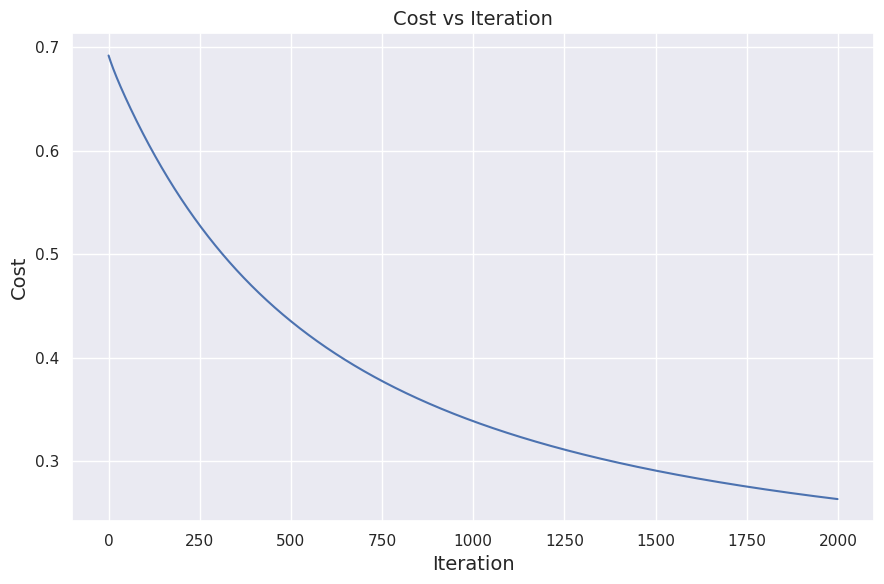

In [ ]:
# Plotting cost over iteration
plt.figure(figsize = (9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Cost", fontsize = 14)
plt.title("Cost vs Iteration", fontsize = 14)
plt.tight_layout()
plt.show()

In [ ]:
# Final parameter values
params_history[-1]

[array([ 6.18198232, -5.68073286]), np.float64(-0.3350697444276029)]

## Prediction and Evaluation

First, we construct some functions to compute and display the *confusion matrix*, and to compute *accuracy*, given the true labels and the predicted labels of the target.

In [ ]:
# Function to compute confusion matrix
def conf_mat(y_test, y_pred):
    """
    Computes confusion matrix
    Args:
      y_test (array_like): true binary (0 or 1) labels
      y_pred (array_like): predicted binary (0 or 1) labels
    Returns:
      confusion_mat (array): A 2D array representing a 2x2 confusion matrix
    """
    y_test, y_pred = list(y_test), list(y_pred)
    count, labels, confusion_mat = len(y_test), [0, 1], np.zeros(shape = (2, 2), dtype = int)
    for i in range(2):
        for j in range(2):
            confusion_mat[i][j] = len([k for k in range(count) if y_test[k] == labels[i] and y_pred[k] == labels[j]])
    return confusion_mat

In [ ]:
# Function to print confusion matrix
def conf_mat_heatmap(y_test, y_pred):
    """
    Prints confusion matrix
    Args:
      y_test (array_like): true binary (0 or 1) labels
      y_pred (array_like): predicted binary (0 or 1) labels
    Returns:
      Nothing, prints a heatmap representing a 2x2 confusion matrix
    """
    confusion_mat = conf_mat(y_test, y_pred)
    labels, confusion_mat_df = [0, 1], pd.DataFrame(confusion_mat, range(2), range(2))
    plt.figure(figsize = (6, 4.75))
    sns.heatmap(confusion_mat_df, annot = True, annot_kws = {"size": 16}, fmt = 'd')
    plt.xticks([0.5, 1.5], labels, rotation = 'horizontal')
    plt.yticks([0.5, 1.5], labels, rotation = 'horizontal')
    plt.xlabel("Predicted label", fontsize = 14)
    plt.ylabel("True label", fontsize = 14)
    plt.title("Confusion Matrix", fontsize = 14)
    plt.grid(False)
    plt.show()

In [ ]:
# Function to compute accuracy
def accuracy(y_test, y_pred):
    """
    Computes accuracy, given true and predicted binary (0 or 1) labels
    Args:
      y_test (array_like): true binary (0 or 1) labels
      y_pred (array_like): predicted binary (0 or 1) labels
    Returns:
      acc (float): accuracy obtained from y_test and y_pred
    """
    confusion_mat = conf_mat(y_test, y_pred)
    num = confusion_mat[0, 0] + confusion_mat[1, 1] # Number of correct predictions
    denom = num + confusion_mat[0, 1] + confusion_mat[1, 0] # Number of total predictions
    acc = num / denom
    return acc

In [ ]:
# Prediction and evaluation on the training set and the test set
y_train_prob = logistic(np.matmul(X_train.to_numpy(), w_out) + (b_out * np.ones(X_train.shape[0])))
y_test_prob = logistic(np.matmul(X_test.to_numpy(), w_out) + (b_out * np.ones(X_test.shape[0])))
y_train_pred, y_test_pred = (y_train_prob > 0.5).astype(int), (y_test_prob > 0.5).astype(int)
print(pd.Series({"Training accuracy": accuracy(y_train, y_train_pred),
                 "Test accuracy": accuracy(y_test, y_test_pred)}).to_string())

Training accuracy    0.936255
Test accuracy        0.934524


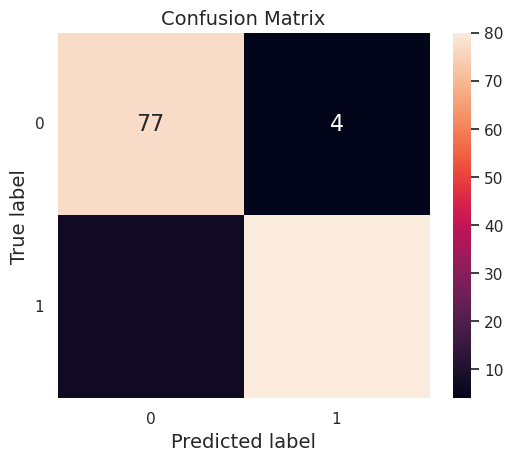

In [ ]:
# Confusion matrix for predictions on the test set
conf_mat_heatmap(y_test, y_test_pred)

Credit : https://mubaris.com/posts/linear-regression/

# Practising Logistic Regression

## Training Happy Singh's Sukimo bot


Happy Singh has noted all weight and diameter of apples and oranges in a csv file. This file comprise our dataset. We need to load this dataset into our program
But how do we read the file in python? The pandas package provides function read_csv for this purpose.
In order to use this function. we must import it our code [Note: The dataset was extended after workshop]

In [67]:
from pandas import read_csv

!wget "https://github.com/adityamoorthy2/Datasets_for_Summer_School/blob/main/apple-orange-dataset.csv?raw=true" -O apple-orange-dataset.csv

--2025-07-01 14:17:27--  https://github.com/adityamoorthy2/Datasets_for_Summer_School/blob/main/apple-orange-dataset.csv?raw=true
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving github.com (github.com)... 20.207.73.82
Connecting to github.com (github.com)|20.207.73.82|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/adityamoorthy2/Datasets_for_Summer_School/raw/refs/heads/main/apple-orange-dataset.csv [following]
--2025-07-01 14:17:28--  https://github.com/adityamoorthy2/Datasets_for_Summer_School/raw/refs/heads/main/apple-orange-dataset.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/adityamoorthy2/Datasets_for_Summer_School/refs/heads/main/apple-orange-dataset.csv [following]
--2025-07-01 14:17:28--  https://raw.githubusercontent.com/adityamoorthy2/Datasets_for_Summer_School/refs/heads/main/apple-orange-dataset.csv
Reso

To use the data in code, it must be stored in a variable. The NUMerical PYthon (abbv. as numpy) provides an efficient way of storing large data in objects called numpy arrays. Unlike pandas, entire numpy pakage must be imported. The type of variable that read_CSV returns, is known to numpy only

In [68]:
import numpy as np

In [69]:
apple_orange = read_csv('apple-orange-dataset.csv')

Let's glance through our data

In [70]:
apple_orange

,label,weight,diameter
0,1,136,10.557432
1,1,192,11.292246
2,1,112,10.120368
3,1,185,8.786955
4,1,129,10.070343
...,...,...,...
414,1,150,18.262581
415,1,122,9.105190
416,1,58,8.688009
417,1,50,6.881814


In [71]:
apple_orange.head()

,label,weight,diameter
0,1,136,10.557432
1,1,192,11.292246
2,1,112,10.120368
3,1,185,8.786955
4,1,129,10.070343


### Extracting labels

In [72]:
y = apple_orange['label']

In [73]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

### Extracting Features 
Features weight and diameter, can be stored in a 2D array or matrix say X

In [74]:
features = ['weight','diameter']
X = apple_orange[features]

In [75]:
X.head()

,weight,diameter
0,136,10.557432
1,192,11.292246
2,112,10.120368
3,185,8.786955
4,129,10.070343


## Visualizing the data
We can plot a graph of apples and oranges in 2D plane. For this we need apples and oranges in separate variables

If you understood how apple_orange[['column_name']] works, its worth to know the following trick.

In [76]:
apple_orange[apple_orange['label'] == 1]

,label,weight,diameter
0,1,136,10.557432
1,1,192,11.292246
2,1,112,10.120368
3,1,185,8.786955
4,1,129,10.070343
...,...,...,...
414,1,150,18.262581
415,1,122,9.105190
416,1,58,8.688009
417,1,50,6.881814


In [77]:
apples = apple_orange[apple_orange['label'] == 1 ]

Feeling confident? Go ahead and do the same for oranges.

In [78]:
oranges = apple_orange[apple_orange['label'] == 0 ]

The best way to find patterns in data is by plotting its graph. Here comes matplotlib package. It provides a fn plot(x,y) in a subpackage pyplot.Lets import it.

In [79]:
import matplotlib.pyplot as plt

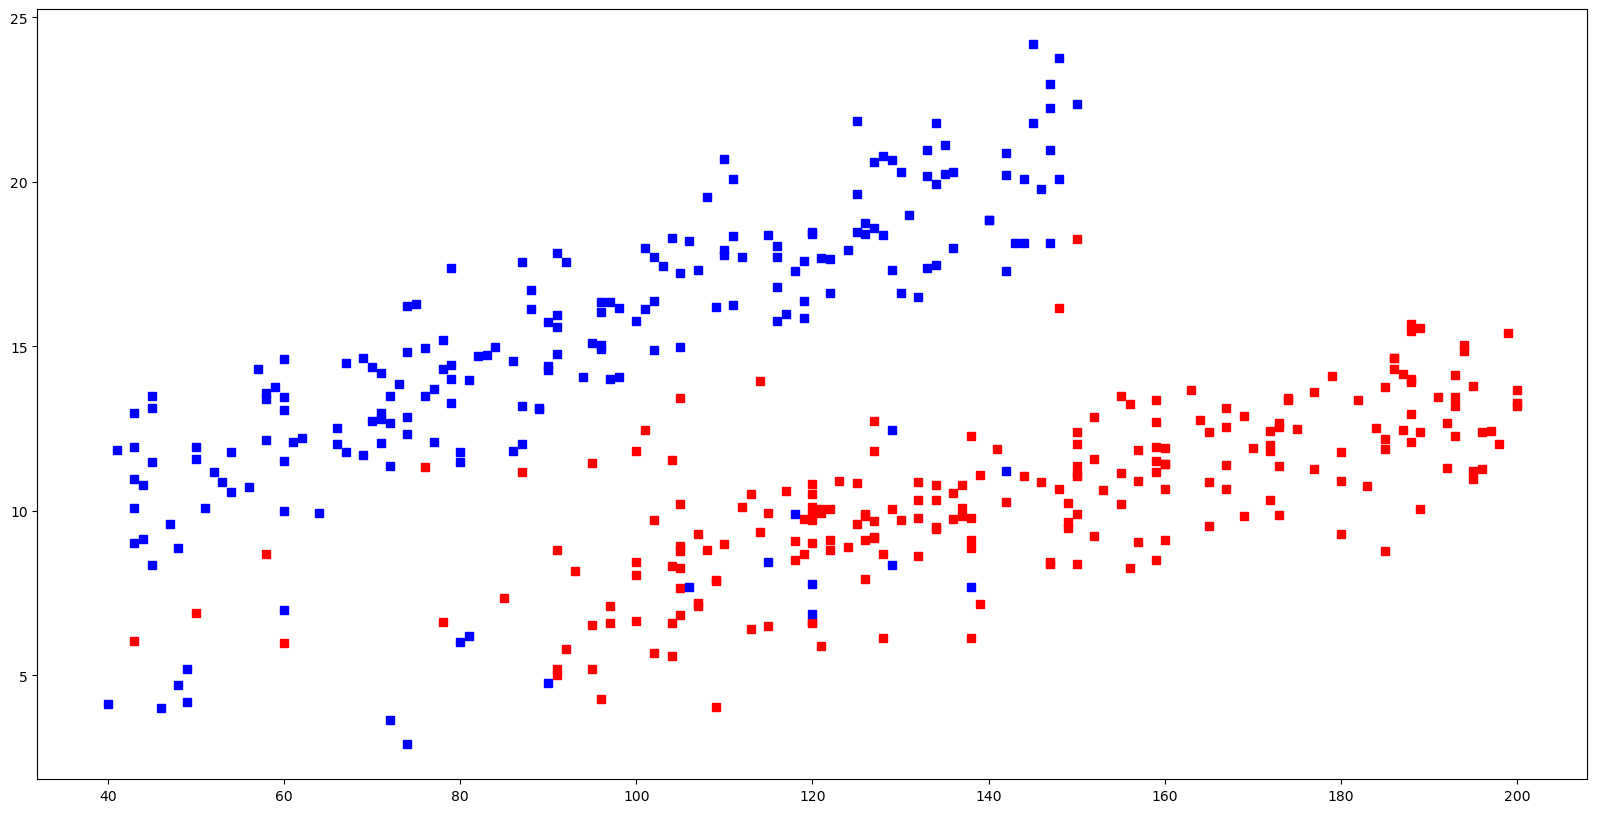

In [80]:
plt.plot(apples['weight'],apples['diameter'], 'rs')
plt.plot(oranges['weight'],oranges['diameter'],'bs')
plt.show()

## Selecting a Classifier
In order to classify apples and oranges we need to a classifier. We learnt about K-Nearest Neighbour classifier in the seminar.

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
model = LogisticRegression(penalty="l2")

## Train Test Split

Our dataset is sufficiently large. So we will split the dataset into training data (say X_train, y_train) and testing data (say X_test, y_test) To ease up the task we can use the train_test_split() function from sklearn's cross_validation subpackage.

In [83]:
from sklearn.model_selection import train_test_split

train_test_split is a special function. It can return multiple arrays at a time! Along with arrays, it takes test_size as argument.

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4,random_state=2)

X_train and y_train now contains 60% of the X and y while X_test and y_test 40% since we used test_size=0.4

Let's generate the model with fit() function and predict labels of X_test with predict()

In [85]:
model.fit(X_train, Y_train)

LogisticRegression()

In [86]:
y_pred = model.predict(X_test)

In [87]:
y_pred

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1])

In [88]:
Y_test.head()

146    1
223    0
193    1
305    0
188    1
Name: label, dtype: int64

### Accuracy
To check accuracy of predictions, we will use accuracy_score fn from metrics subpackage in sklearn

In [89]:
from sklearn.metrics import accuracy_score

### 🎯 What is `accuracy_score`?

The `accuracy_score` is a metric used to evaluate the performance of **classification models**. It measures the proportion of **correct predictions** made by the model compared to the total number of predictions.

---

### 🧮 **Formula**

$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Where:
- **TP** = True Positives  
- **TN** = True Negatives  
- **FP** = False Positives  
- **FN** = False Negatives  

---

In [90]:
100*accuracy_score(y_pred, Y_test)

93.45238095238095

In [91]:
from sklearn.metrics import precision_score

print(precision_score(Y_test, y_pred))

0.9523809523809523


In [92]:
from sklearn.metrics import recall_score

print(recall_score(Y_test, y_pred))

0.9195402298850575


In [93]:
print((2 * precision_score(Y_test, y_pred) * recall_score(Y_test, y_pred)) / (precision_score(Y_test, y_pred) + recall_score(Y_test, y_pred)))

0.935672514619883


### 🤖 What is `f1_score` (in Simple Words)?

The **F1 score** is a number that tells us **how good a classification model is** — especially when we care about both:

- **Precision**: How many of the positive predictions were actually correct?
- **Recall**: How many of the actual positives did the model catch?

The F1 score combines these two into **one number**.

---

### 🧠 Why use F1 Score?

Imagine a model for **detecting spam emails**:
- If it marks everything as spam, it catches all spam (high recall), but makes lots of mistakes (low precision).
- If it only marks 1 or 2 obvious spam emails, it’s very precise, but misses most spam (low recall).

**F1 score finds a balance** between these two — it's high only when **both precision and recall are high**.

---

### 🎯 When should I use F1 Score?

Use it when:
- Your data is **imbalanced** (e.g. 90% not spam, 10% spam).
- You want to **balance catching positives** without making too many **wrong guesses**.

---

### 🔢 F1 Score Scale

- **1.0** → Perfect model (gets everything right)
- **0.0** → Totally wrong
- Between **0 and 1** → the closer to 1, the better

---

### 🧮 **Formula**

$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

Where:
- **Precision** = $ \frac{TP}{TP + FP} $ — How many predicted positives are actually correct.
- **Recall** = $ \frac{TP}{TP + FN} $ — How many actual positives were correctly identified.

---


In [94]:
from sklearn.metrics import f1_score

print(f1_score(Y_test, y_pred))

0.935672514619883
